### 【前準備】

In [1]:
###################
#インポート
###################

import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from sklearn.preprocessing import StandardScaler#標準化のライブラリ
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

#pd.set_option('display.max_rows', None) #データフレームを隠さず表示

pd.set_option('display.max_rows', 10) #カラムの最大表示数を10に変更

pd.set_option("display.max_columns", None) #データフレームのカラムを隠さず全て表示


df = pd.read_csv("train.csv") #CSVをインポート
display(df) #インポートしたデータを出力

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

### 【問題1】練習のために特徴量の選択

      GrLivArea  YearBuilt  SalePrice
0          1710       2003     208500
1          1262       1976     181500
2          1786       2001     223500
3          1717       1915     140000
4          2198       2000     250000
...         ...        ...        ...
1455       1647       1999     175000
1456       2073       1978     210000
1457       2340       1941     266500
1458       1078       1950     142125
1459       1256       1965     147500

[1460 rows x 3 columns]


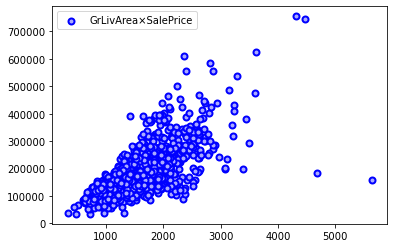

・リビングの広さに比例して価格も上がっている


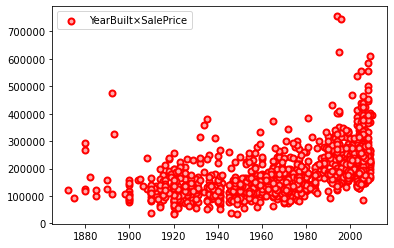

・アメリカは古い住宅が多いので古いからと言って極端に価格が下がることはない。極端に新しい建物は価格が高い


In [2]:
#説明変数GrLivArea(リビングエリアの平方フィート)　・YearBuilt(築年数)　・目的変数SalePriceをスライス
df_3data = df.loc[ :  ,  [ 'GrLivArea' ,  'YearBuilt' ,  'SalePrice' ] ]

print(df_3data)

#散布図を書いてみる(GrLivArea×SalePrice　と　YearBuilt×SalePrice)

#----インポート----
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

GrLivArea = df.loc[ :  ,  [ 'GrLivArea'] ] #Ｘ軸のデータに使うGrLivArea
YearBuilt = df.loc[ :  ,  [ 'YearBuilt'] ] #Ｘ軸のデータにYearBuilt
SalePrice = df.loc[ :  ,  [ 'SalePrice'] ] #Ｙ軸のデータにSalePrice
 

#GrLivArea×SalePriceのグラフ
plt.scatter(GrLivArea,SalePrice, linewidths=2, c='#aaaaFF', edgecolors='b' )
plt.legend(['GrLivArea×SalePrice', 'x2, y2'])  # 凡例を表示
plt.show()
print("・リビングの広さに比例して価格も上がっている")

#YearBuilt×SalePriceのグラフ
plt.scatter(YearBuilt,SalePrice, linewidths=2, c='#FFaaaa', edgecolors='r' )
plt.legend(['YearBuilt×SalePrice', 'x2, y2'])  # 凡例を表示
plt.show()
print("・アメリカは古い住宅が多いので古いからと言って極端に価格が下がることはない。極端に新しい建物は価格が高い")


### 【問題2】線形回帰による推定と評価
説明変数GrLivArea(リビングエリア広さ)　・YearBuilt(築年数)と　目的変数SalePrice（販売価格）の関係について


In [3]:
#-------------GrLivArea　・　YearBuilt　だけを標準化する。-----------

#データフレームのコピーを作成
scaled_features = df_3data.copy()

#標準化する２つのカラムを定義する
col_names = ['GrLivArea', 'YearBuilt']


#featuresとして、標準化するカラムのみのデータフレームを作る
features = scaled_features[col_names]

#scalerは
scaler = StandardScaler().fit(features.values) #☆★これは何を表してるのか謎☆★

#ここは分かったら埋める
features = scaler.transform(features.values)   #☆★これは何を表してるのか謎☆★

#ここは分かったら埋める
scaled_features[col_names] = features          #☆★これは何を表してるのか謎☆★

#出力
print("・GrLivAreaとYearBuiltを標準化したデータフレーム \n")
print(scaled_features)



・GrLivAreaとYearBuiltを標準化したデータフレーム 

      GrLivArea  YearBuilt  SalePrice
0      0.370333   1.050994     208500
1     -0.482512   0.156734     181500
2      0.515013   0.984752     223500
3      0.383659  -1.863632     140000
4      1.299326   0.951632     250000
...         ...        ...        ...
1455   0.250402   0.918511     175000
1456   1.061367   0.222975     210000
1457   1.569647  -1.002492     266500
1458  -0.832788  -0.704406     142125
1459  -0.493934  -0.207594     147500

[1460 rows x 3 columns]


In [4]:
#-------------訓練データと検証データに分割-----------

#train_test_splitに代入してデータを分ける為、特徴量のDFと目的変数のDFに分割する
X = scaled_features.loc[: , ['GrLivArea','YearBuilt']] #[]の中に[]をつけているのでタイプはDFになる。
y = scaled_features.loc[: , ['SalePrice']]

#train_test_split訓練データと検証データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_test_split(X, y, shuffle=True)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))


      GrLivArea  YearBuilt
615   -0.878476  -0.273836
613   -0.752833   1.183477
1303   0.191388   1.117235
486   -0.842306  -0.207594
561   -0.240745   0.090492
...         ...        ...
1095  -0.383521   1.150356
1130   0.886229  -1.433062
1294  -1.240174  -0.538802
860   -0.170310  -1.764269
1126   0.075264   1.183477

[978 rows x 2 columns]
      GrLivArea  YearBuilt
892   -0.851824  -0.273836
1105   2.106483   0.752907
413   -0.927971  -1.466183
522    0.282764  -0.803768
1036   0.199003   1.183477
...         ...        ...
1010  -0.465379  -0.770647
390   -0.282626  -2.360443
1409   1.099440   0.487941
847   -1.240174   0.024251
1284   1.773340  -1.731149

[482 rows x 2 columns]
      SalePrice
615      137500
613      147000
1303     232000
486      156000
561      170000
...         ...
1095     176432
1130     135000
1294     115000
860      189950
1126     174000

[978 rows x 1 columns]
      SalePrice
892      154500
1105     325000
413      115000
522      159000
1036    

In [5]:

print("・《線形回帰》による学習\n")

from sklearn.linear_model import LinearRegression

#訓練用データのデータを用意
X = X_train
y = y_train

# 予測モデルを作成
clf = LinearRegression().fit(X, y)

# 決定係数
clf.score(X, y)

# 回帰係数
clf.coef_

# 切片 (誤差)
clf.intercept_

#予測モデルに検証用のXを代入してｙの予測データを作成
y_test_pred2 = clf.predict(X_test)

#小数点以下の値を切り捨て
y_test_pred1 = np.floor(y_test_pred2)

#小数点切り捨てはfloatなのでintに変換
y_test_pred = y_test_pred1.astype(int)

print(y_test_pred.shape)
print(type(y_test_pred))  #★☆★☆予測したデータはndarrayで出てきた。DFとndarrayで検証とかしていいの？

#ｙの予測したデータを出力
print("ｙの予測したデータ\n{}".format(y_test_pred))

print("\n")

#ｙの実際のデータをndarrayに変換（予測したデータがndarrayなのと、グラフはndarrayを使う為）
y_test_ndarray = np.array(y_test)
print(y_test_ndarray.shape)
print(type(y_test_ndarray))
print("\n")

#ｙの実際のデータを出力
print("ｙの実際のデータ\n{}".format(y_test_ndarray))



・《線形回帰》による学習

(482, 1)
<class 'numpy.ndarray'>
ｙの予測したデータ
[[132158]
 [302153]
 [ 91199]
 [168372]
 [226826]
 [102679]
 [185769]
 [182147]
 [100600]
 [152659]
 [132046]
 [120155]
 [ 87632]
 [216172]
 [225758]
 [116446]
 [232574]
 [134892]
 [ 82505]
 [210168]
 [191088]
 [225206]
 [211981]
 [113180]
 [201755]
 [174951]
 [202001]
 [101601]
 [215015]
 [202026]
 [ 91312]
 [260438]
 [293407]
 [114599]
 [227206]
 [140266]
 [192768]
 [249976]
 [292071]
 [108393]
 [111595]
 [256759]
 [130011]
 [265280]
 [122987]
 [147149]
 [119367]
 [125258]
 [287800]
 [167391]
 [111555]
 [190949]
 [166593]
 [307917]
 [155263]
 [234855]
 [226019]
 [151850]
 [150013]
 [102477]
 [ 46159]
 [143783]
 [299335]
 [217758]
 [239618]
 [215287]
 [105241]
 [279589]
 [152924]
 [204149]
 [190191]
 [150033]
 [111649]
 [116165]
 [294868]
 [186225]
 [284879]
 [283027]
 [135271]
 [115978]
 [134330]
 [ 88268]
 [115712]
 [ 90041]
 [177182]
 [147832]
 [254069]
 [190195]
 [155263]
 [211247]
 [160101]
 [187334]
 [129562]
 [303414]
 [1

In [6]:
print("・《線形回帰》平均二乗誤差について\n")

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#------------↓データの詳細------------
# X_train　X訓練用データの標準化　＃データフレーム(978, 2)
# X_test　X検証用データの標準化　＃データフレーム482, 2)

# y_train　訓練用データの目的変数　＃データフレーム(978, 1)
# y_test　検証用データの正解（目的変数データ）　＃データフレーム(482, 1)

# y_test_pred　検証用データの目的変数の予測データ　＃（ndarray）(482, 1)　＃ndarray　★☆これを使う
# y_test_ndarray　y_test正解データのndarray　＃（ndarray）(482, 1)　★☆これを使う
#------------↑------------

#平均絶対誤差を出力
mae = mean_absolute_error(y_test_ndarray, y_test_pred)
print("平均絶対誤差：{}".format(mae))
print("\n")

#平均二乗誤差を出力
mse = mean_squared_error(y_test_ndarray, y_test_pred)
print("平均二乗誤差：{}".format(mse))
print("\n")

rmse = np.sqrt(mean_squared_error(y_test_ndarray, y_test_pred))
print("二乗平均平方根誤差：{}".format(rmse))


・《線形回帰》平均二乗誤差について

平均絶対誤差：30999.39211618257


平均二乗誤差：2289586630.375519


二乗平均平方根誤差：47849.62518531905


・《線形回帰》実際のデータと予測結果の比較

 GrLivArea×SalePriceのグラフ



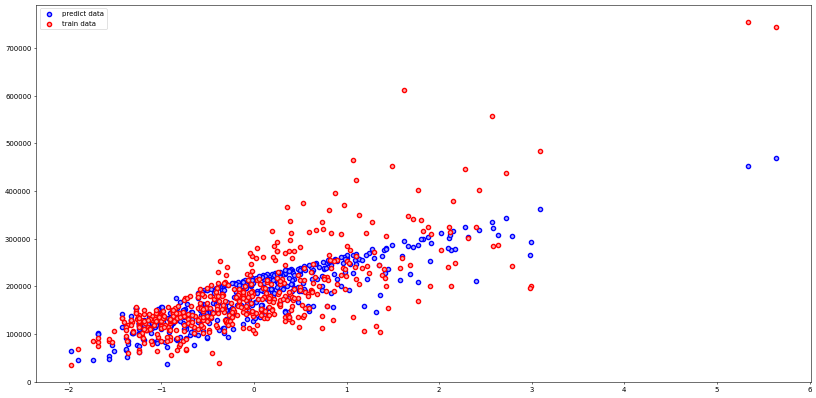

In [7]:
print("・《線形回帰》実際のデータと予測結果の比較\n")

print(" GrLivArea×SalePriceのグラフ\n") #★☆★☆これは結局GrLivArea×SalePriceとYearBuilt×SalePriceの両方グラフを書いているが、予測データは２つの特徴量を考慮した予測値ではないのか。だとしたら３次元のグラフを書かないと意味ないのでは
#GrLivArea×SalePriceのグラフ

scaled_features

#------------予測データのXy------------

#X軸を特徴量とする為X_testデータの　GrLivArea　を抜き出し、グラフ用のDFを作る
X1 = X_GrLivArea = X_test.loc[ :  ,  [ 'GrLivArea' ] ]
#学習し予測した価格ndarray
y1 = pd.DataFrame(y_test_pred)

#------------実際データのXy------------

#X軸を特徴量とする為X_testデータの　GrLivArea　を抜き出し、グラフ用のDFを作る
X2 = X_GrLivArea = X_test.loc[ :  ,  [ 'GrLivArea' ] ]
#実際の価格ndarray
y2 = pd.DataFrame(y_test_ndarray)

#------------散布図プロット------------

plt.figure(figsize=(20, 10), dpi=50)

#予測データの描画
plt.scatter(X1,y1, linewidths=2, c='#aaaaFF', edgecolors='b' )

#実際データの描画
plt.scatter(X2,y2, linewidths=2, c='#FFaaaa', edgecolors='r' )

# 凡例を表示
plt.legend(['predict data', 'train data'])  

plt.show()




 YearBuilt×SalePriceのグラフ



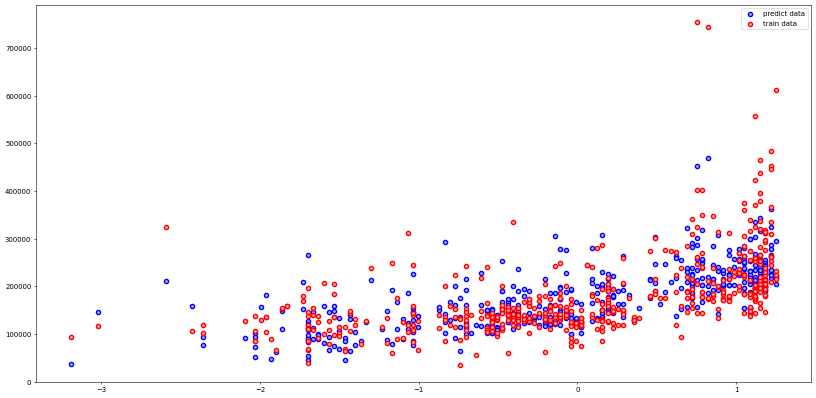

In [8]:

print(" YearBuilt×SalePriceのグラフ\n")#★☆★☆これは結局GrLivArea×SalePriceとYearBuilt×SalePriceの両方グラフを書いているが、予測データは２つの特徴量を考慮した予測値ではないのか。だとしたら３次元のグラフを書かないと意味ないのでは
#YearBuilt×SalePriceのグラフ

scaled_features

#------------予測データのXy------------

#X軸を特徴量とする為X_testデータの　YearBuilt　を抜き出し、グラフ用のDFを作る
X1 = X_GrLivArea = X_test.loc[ :  ,  [ 'YearBuilt' ] ]
#学習し予測した価格ndarray
y1 = pd.DataFrame(y_test_pred)

#------------実際データのXy------------

#X軸を特徴量とする為X_testデータの　YearBuilt　を抜き出し、グラフ用のDFを作る
X2 = X_GrLivArea = X_test.loc[ :  ,  [ 'YearBuilt' ] ]
#実際の価格ndarray
y2 = pd.DataFrame(y_test_ndarray)

#------------散布図プロット------------

plt.figure(figsize=(20, 10), dpi=50)

#予測データの描画
plt.scatter(X1,y1, linewidths=2, c='#aaaaFF', edgecolors='b' )

#実際データの描画
plt.scatter(X2,y2, linewidths=2, c='#FFaaaa', edgecolors='r' )

# 凡例を表示
plt.legend(['predict data', 'train data'])  

plt.show()



In [9]:

print("・《SVM》による学習\n")

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#------------↓データの詳細------------
# X_train　X訓練用データの標準化　＃データフレーム(978, 2)
# X_test　X検証用データの標準化　＃データフレーム482, 2)

# y_train　訓練用データの目的変数　＃データフレーム(978, 1)
# y_test　検証用データの正解（目的変数データ）　＃データフレーム(482, 1)

# y_test_pred　検証用データの目的変数の予測データ　＃（ndarray）(482, 1)　＃ndarray　★☆これを使う
# y_test_ndarray　y_test正解データのndarray　＃（ndarray）(482, 1)　★☆これを使う
#------------↑------------

#訓練用データのデータを用意
X = X_train
y = y_train

print(X.shape) 
print(y.shape)
print(X_test.shape)

#これは何を意味するのか
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

#SVMメソッドで学習
clf.fit(X, y)

#検証データ(X_test)を引数としてクラスラベル予測データを出力
y_test_pred = clf.predict(X_test)

#クラスラベル予測データを出力
print(type(y_test_pred))
print(y_test_pred.shape)
print(y_test_pred)




・《SVM》による学習

(978, 2)
(978, 1)
(482, 2)


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<class 'numpy.ndarray'>
(482,)
[135000 250000 110000 140000 190000 110000 140000 190000 110000 135000
 135000 110000 110000 180000 190000 110000 190000 135000 110000 173000
 190000 173000 173000 110000 190000 140000 155000 110000 190000 155000
 128000 200000 235000 110000 190000 135000 190000 200000 250000 110000
 110000 200000 135000 200000 110000 122000 110000 135000 250000 140000
 110000 190000 140000 250000 140000 200000 190000 140000 140000 110000
 110000 135000 250000 173000 200000 190000 110000 250000 140000 180000
 190000 135000 110000 110000 250000 155000 250000 250000 135000 110000
 135000 110000 110000 110000 140000 135000 200000 190000 140000 173000
 135000 190000 140000 250000 190000 155000 135000 180000 173000 250000
 190000 200000 190000 110000 140000 135000 135000 190000 140000 190000
 110000 140000 135000 135000 200000 110000 110000 135000 190000 190000
 140000 140000 190000 140000 155000 110000 250000 110000 140000 190000
 180000 200000 190000 140000 110000 190000 190

In [10]:
print("・《SVM》平均二乗誤差について\n")

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#------------↓データの詳細------------
# X_train　X訓練用データの標準化　＃データフレーム(978, 2)
# X_test　X検証用データの標準化　＃データフレーム482, 2)

# y_train　訓練用データの目的変数　＃データフレーム(978, 1)
# y_test　検証用データの正解（目的変数データ）　＃データフレーム(482, 1)

# y_test_pred　検証用データの目的変数の予測データ　＃（ndarray）(482, 1)　＃ndarray　★☆これを使う
# y_test_ndarray　y_test正解データのndarray　＃（ndarray）(482, 1)　★☆これを使う
#------------↑------------

#平均絶対誤差を出力
mae = mean_absolute_error(y_test_ndarray, y_test_pred)
print("平均絶対誤差：{}".format(mae))
print("\n")

#平均二乗誤差を出力
mse = mean_squared_error(y_test_ndarray, y_test_pred)
print("平均二乗誤差：{}".format(mse))
print("\n")

rmse = np.sqrt(mean_squared_error(y_test_ndarray, y_test_pred))
print("二乗平均平方根誤差：{}".format(rmse))

・《SVM》平均二乗誤差について

平均絶対誤差：36916.77178423236


平均二乗誤差：4459787025.481328


二乗平均平方根誤差：66781.63688830432


・《SVM》実際のデータと予測結果の比較



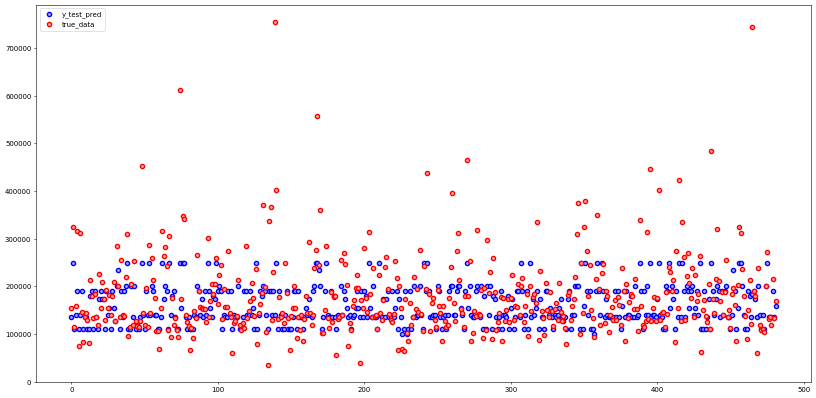

In [11]:
print("・《SVM》実際のデータと予測結果の比較\n")

#YearBuilt×SalePriceのグラフ

scaled_features

#------------予測データのXy------------

#yの個数が482の為、X軸用のndarray
X1 = np.arange(482)
#学習し予測した価格ndarray
y1 = pd.DataFrame(y_test_pred)

#------------実際データのXy------------

#yの個数が482の為、X軸用のndarray
X2 = np.arange(482)
#実際の価格ndarray
y2 = pd.DataFrame(y_test_ndarray)

#------------散布図プロット------------

plt.figure(figsize=(20, 10), dpi=50)

#実際データの描画
plt.scatter(X1,y1, linewidths=2, c='#aaaaFF', edgecolors='b' )
plt.legend(['y_test_pred', 'predict_data'])  # 凡例を表示

#予測データの描画
plt.scatter(X2,y2, linewidths=2, c='#FFaaaa', edgecolors='r' )
plt.legend(['y_test_pred', 'true_data'])  # 凡例を表示

plt.show()



 YearBuilt×SalePriceのグラフ



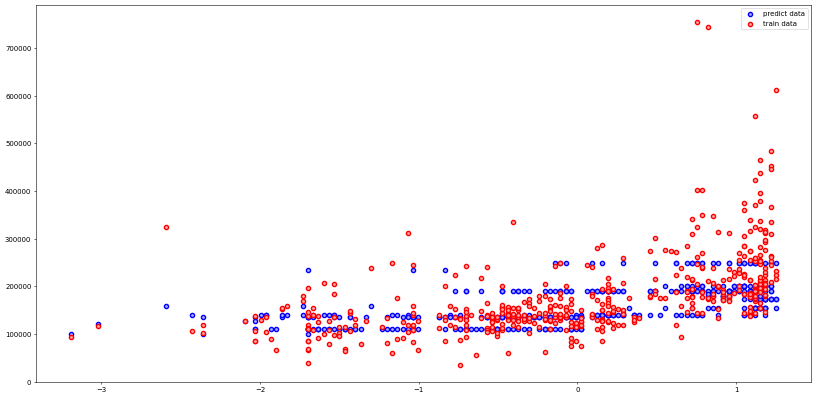

In [12]:

print(" YearBuilt×SalePriceのグラフ\n")#★☆★☆これは結局GrLivArea×SalePriceとYearBuilt×SalePriceの両方グラフを書いているが、予測データは２つの特徴量を考慮した予測値ではないのか。だとしたら３次元のグラフを書かないと意味ないのでは
#YearBuilt×SalePriceのグラフ

scaled_features

#------------予測データのXy------------

#X軸を特徴量とする為X_testデータの　YearBuilt　を抜き出し、グラフ用のDFを作る
X1 = X_GrLivArea = X_test.loc[ :  ,  [ 'YearBuilt' ] ]
#学習し予測した価格ndarray
y1 = pd.DataFrame(y_test_pred)

#------------実際データのXy------------

#X軸を特徴量とする為X_testデータの　YearBuilt　を抜き出し、グラフ用のDFを作る
X2 = X_GrLivArea = X_test.loc[ :  ,  [ 'YearBuilt' ] ]
#実際の価格ndarray
y2 = pd.DataFrame(y_test_ndarray)

#------------散布図プロット------------

plt.figure(figsize=(20, 10), dpi=50)

#予測データの描画
plt.scatter(X1,y1, linewidths=2, c='#aaaaFF', edgecolors='b' )

#実際データの描画
plt.scatter(X2,y2, linewidths=2, c='#FFaaaa', edgecolors='r' )

# 凡例を表示
plt.legend(['predict data', 'train data'])  

plt.show()



In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

print("・《決定木》による学習\n")

#訓練用データのデータを用意
X = X_train
y = y_train

#これがなんだかわかりませんでしたモジュールの呼び出し？
clf = DecisionTreeClassifier(random_state=0)

#決定木メソッドで学習
clf = clf.fit(X, y)

#検証データ(X_test)を引数としてクラスラベル予測データを出力
y_test_pred = clf.predict(X_test)

print(type(y_test_pred))
print(y_test_pred.shape)
print(y_test_pred)

・《決定木》による学習

<class 'numpy.ndarray'>
(482,)
[156000 290000 102000 160000 235000  81000 220000 148500  80000  82000
 125000 129000 106500 259000 200000 139400 196500 145000 108500 180000
 230000 235128 163990 112000 174000 179000 200141  82000 236500 202500
 110000 200000 259500 112000 250000 155000 177000 226000 260000 112000
 155000 228000 129000 372500 178400 265979 147000 109900 255900 153000
  92900 190000 171500 299800 141000 318000 164000 160000 125000 115000
  60000 142000 354000 174000 377500 277000 108000 501837 123600 177000
 118964 146000 114500  92900 325300 245500 222000 260000 132500 133000
  94500 101000 111000 119750 161750 141500 252000 179900 141000 172785
  98000 215000 138000 335000 180000 194700 137450 174000 179665 262280
 135000 226700 151400  99900 148500 157500 180000 178000 123600 200000
  84500 165500 132000 115000 147000 120500 116000  97000 210000 154000
 125000 141000 236500 143000 155000 117500 290000  87000 145000 135000
 227000 274725 204750 118500  725

In [14]:
print("・《決定木》平均二乗誤差について\n")

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#------------↓データの詳細------------
# X_train　X訓練用データの標準化　＃データフレーム(978, 2)
# X_test　X検証用データの標準化　＃データフレーム482, 2)

# y_train　訓練用データの目的変数　＃データフレーム(978, 1)
# y_test　検証用データの正解（目的変数データ）　＃データフレーム(482, 1)

# y_test_pred　検証用データの目的変数の予測データ　＃（ndarray）(482, 1)　＃ndarray　★☆これを使う
# y_test_ndarray　y_test正解データのndarray　＃（ndarray）(482, 1)　★☆これを使う
#------------↑------------

#平均絶対誤差を出力
mae = mean_absolute_error(y_test_ndarray, y_test_pred)
print("平均絶対誤差：{}".format(mae))
print("\n")

#平均二乗誤差を出力
mse = mean_squared_error(y_test_ndarray, y_test_pred)
print("平均二乗誤差：{}".format(mse))
print("\n")

rmse = np.sqrt(mean_squared_error(y_test_ndarray, y_test_pred))
print("二乗平均平方根誤差：{}".format(rmse))

・《決定木》平均二乗誤差について

平均絶対誤差：36526.890041493774


平均二乗誤差：3047930048.620332


二乗平均平方根誤差：55208.061445954896


・《SVM》実際のデータと予測結果の比較



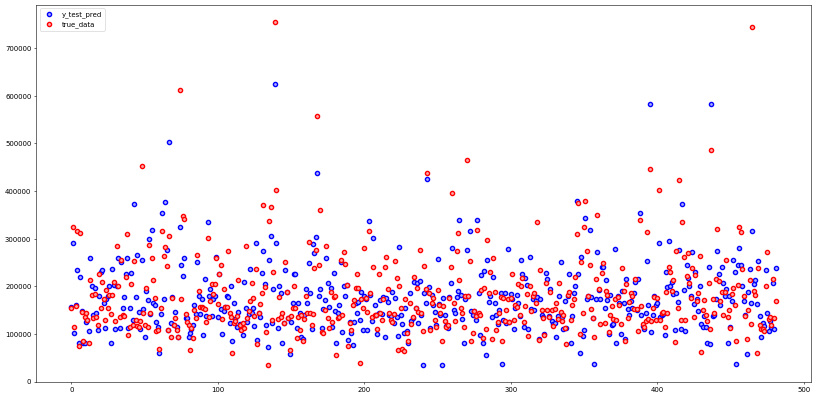

In [15]:
print("・《決定木》実際のデータと予測結果の比較\n")

#YearBuilt×SalePriceのグラフ

scaled_features

#------------予測データのXy------------

#yの個数が482の為、X軸用のndarray
X1 = np.arange(482)
#学習し予測した価格ndarray
y1 = pd.DataFrame(y_test_pred)

#------------実際データのXy------------

#yの個数が482の為、X軸用のndarray
X2 = np.arange(482)
#実際の価格ndarray
y2 = pd.DataFrame(y_test_ndarray)

#------------散布図プロット------------

plt.figure(figsize=(20, 10), dpi=50)

#実際データの描画
plt.scatter(X1,y1, linewidths=2, c='#aaaaFF', edgecolors='b' )
plt.legend(['y_test_pred', 'predict_data'])  # 凡例を表示

#予測データの描画
plt.scatter(X2,y2, linewidths=2, c='#FFaaaa', edgecolors='r' )
plt.legend(['y_test_pred', 'true_data'])  # 凡例を表示

plt.show()

 YearBuilt×SalePriceのグラフ



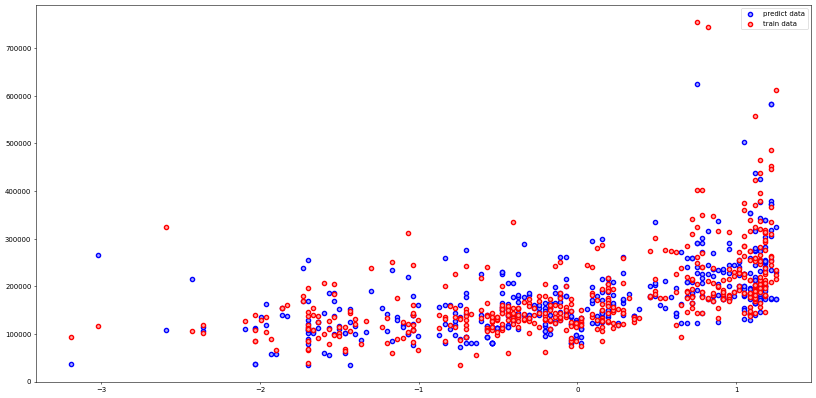

In [16]:

print(" YearBuilt×SalePriceのグラフ\n")#★☆★☆これは結局GrLivArea×SalePriceとYearBuilt×SalePriceの両方グラフを書いているが、予測データは２つの特徴量を考慮した予測値ではないのか。だとしたら３次元のグラフを書かないと意味ないのでは
#YearBuilt×SalePriceのグラフ

scaled_features

#------------予測データのXy------------

#X軸を特徴量とする為X_testデータの　YearBuilt　を抜き出し、グラフ用のDFを作る
X1 = X_GrLivArea = X_test.loc[ :  ,  [ 'YearBuilt' ] ]
#学習し予測した価格ndarray
y1 = pd.DataFrame(y_test_pred)

#------------実際データのXy------------

#X軸を特徴量とする為X_testデータの　YearBuilt　を抜き出し、グラフ用のDFを作る
X2 = X_GrLivArea = X_test.loc[ :  ,  [ 'YearBuilt' ] ]
#実際の価格ndarray
y2 = pd.DataFrame(y_test_ndarray)

#------------散布図プロット------------

plt.figure(figsize=(20, 10), dpi=50)

#予測データの描画
plt.scatter(X1,y1, linewidths=2, c='#aaaaFF', edgecolors='b' )

#実際データの描画
plt.scatter(X2,y2, linewidths=2, c='#FFaaaa', edgecolors='r' )

# 凡例を表示
plt.legend(['predict data', 'train data'])  

plt.show()



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

print("・《ランダムフォレスト》による学習\n")

#訓練用データのデータを用意
X = X_train
y = y_train

clf = RandomForestClassifier(max_depth=2, random_state=0)

#訓練用データで学習
clf.fit(X, y)

#検証データ(X_test)を引数としてクラスラベル予測データを出力
y_test_pred = clf.predict(X_test)

print(type(y_test_pred))
print(y_test_pred.shape)
print(y_test_pred)

・《ランダムフォレスト》による学習



<ipython-input-17-4f2b54b37ae4>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)


<class 'numpy.ndarray'>
(482,)
[110000 290000 110000 135000 190000  80000 140000 190000  80000 110000
 135000 110000 110000 190000 250000 110000 190000 110000 110000 215000
 140000 190000 222000 110000 215000 140000 140000 110000 250000 140000
 135000 250000 235000 110000 190000 125000 135000 190000 290000 110000
 110000 250000 140000 250000 110000 124000 125000 125000 250000 140000
 110000 190000 140000 190000 140000 190000 250000 140000 140000 110000
  60000 140000 250000 190000 190000 135000 110000 250000 140000 215000
 190000 140000 110000 110000 269500 140000 250000 250000 110000 110000
 140000 110000 110000 110000 140000 135000 250000 170000 140000 174000
 135000 190000 140000 170000 190000 140000 135000 215000 190000 250000
 190000 190000 190000 110000 140000 135000 140000 212000 140000 190000
 110000 140000 110000 135000 190000 110000 110000 110000 190000 190000
 140000 140000 250000 140000 173000 125000 250000 110000 140000 190000
 190000 250000 250000 140000 110000 190000 190

In [18]:
print("・《ランダムフォレスト》平均二乗誤差について\n")

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#------------↓データの詳細------------
# X_train　X訓練用データの標準化　＃データフレーム(978, 2)
# X_test　X検証用データの標準化　＃データフレーム482, 2)

# y_train　訓練用データの目的変数　＃データフレーム(978, 1)
# y_test　検証用データの正解（目的変数データ）　＃データフレーム(482, 1)

# y_test_pred　検証用データの目的変数の予測データ　＃（ndarray）(482, 1)　＃ndarray　★☆これを使う
# y_test_ndarray　y_test正解データのndarray　＃（ndarray）(482, 1)　★☆これを使う
#------------↑------------

#平均絶対誤差を出力
mae = mean_absolute_error(y_test_ndarray, y_test_pred)
print("平均絶対誤差：{}".format(mae))
print("\n")

#平均二乗誤差を出力
mse = mean_squared_error(y_test_ndarray, y_test_pred)
print("平均二乗誤差：{}".format(mse))
print("\n")

rmse = np.sqrt(mean_squared_error(y_test_ndarray, y_test_pred))
print("二乗平均平方根誤差：{}".format(rmse))

・《ランダムフォレスト》平均二乗誤差について

平均絶対誤差：39761.67634854772


平均二乗誤差：4405985833.672199


二乗平均平方根誤差：66377.60039103703


・《SVM》実際のデータと予測結果の比較



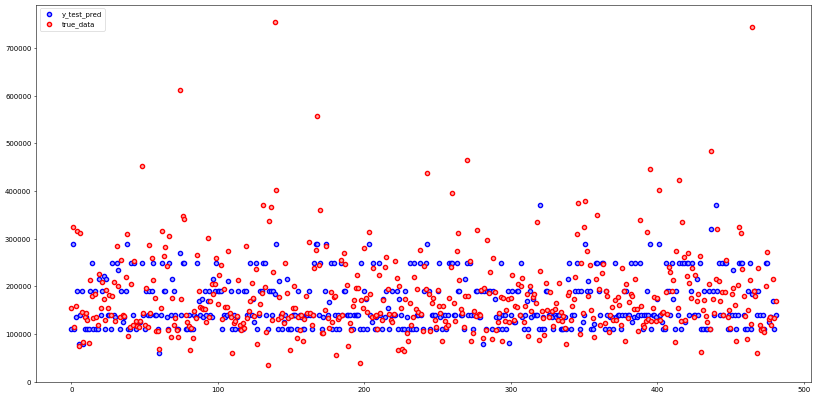

In [19]:
print("・《ランダムフォレスト》実際のデータと予測結果の比較\n")

#YearBuilt×SalePriceのグラフ

scaled_features

#------------予測データのXy------------

#yの個数が482の為、X軸用のndarray
X1 = np.arange(482)
#学習し予測した価格ndarray
y1 = pd.DataFrame(y_test_pred)

#------------実際データのXy------------

#yの個数が482の為、X軸用のndarray
X2 = np.arange(482)
#実際の価格ndarray
y2 = pd.DataFrame(y_test_ndarray)

#------------散布図プロット------------

plt.figure(figsize=(20, 10), dpi=50)

#実際データの描画
plt.scatter(X1,y1, linewidths=2, c='#aaaaFF', edgecolors='b' )
plt.legend(['y_test_pred', 'predict_data'])  # 凡例を表示

#予測データの描画
plt.scatter(X2,y2, linewidths=2, c='#FFaaaa', edgecolors='r' )
plt.legend(['y_test_pred', 'true_data'])  # 凡例を表示

plt.show()

 YearBuilt×SalePriceのグラフ



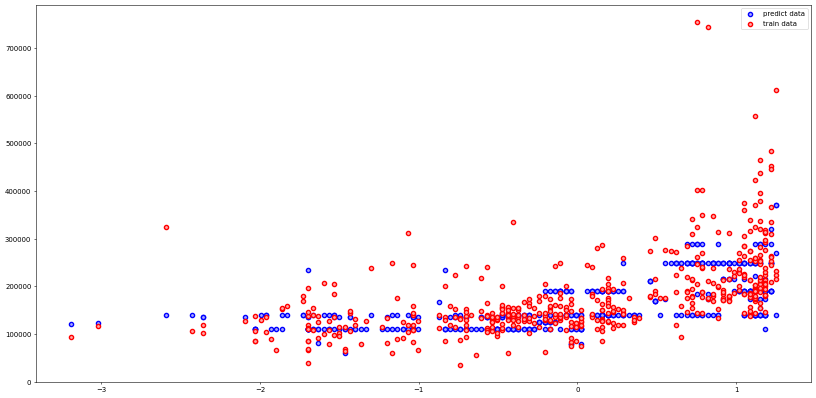

In [20]:

print(" YearBuilt×SalePriceのグラフ\n")#★☆★☆これは結局GrLivArea×SalePriceとYearBuilt×SalePriceの両方グラフを書いているが、予測データは２つの特徴量を考慮した予測値ではないのか。だとしたら３次元のグラフを書かないと意味ないのでは
#YearBuilt×SalePriceのグラフ

scaled_features

#------------予測データのXy------------

#X軸を特徴量とする為X_testデータの　YearBuilt　を抜き出し、グラフ用のDFを作る
X1 = X_GrLivArea = X_test.loc[ :  ,  [ 'YearBuilt' ] ]
#学習し予測した価格ndarray
y1 = pd.DataFrame(y_test_pred)

#------------実際データのXy------------

#X軸を特徴量とする為X_testデータの　YearBuilt　を抜き出し、グラフ用のDFを作る
X2 = X_GrLivArea = X_test.loc[ :  ,  [ 'YearBuilt' ] ]
#実際の価格ndarray
y2 = pd.DataFrame(y_test_ndarray)

#------------散布図プロット------------

plt.figure(figsize=(20, 10), dpi=50)

#予測データの描画
plt.scatter(X1,y1, linewidths=2, c='#aaaaFF', edgecolors='b' )

#実際データの描画
plt.scatter(X2,y2, linewidths=2, c='#FFaaaa', edgecolors='r' )

# 凡例を表示
plt.legend(['predict data', 'train data'])  

plt.show()



### 【問題3】手法の比較

In [32]:
table =  pd.DataFrame([['線形回帰', 30999, 2289586630, 47849], ['SVM', 36916, 4459787025, 66781], ['決定木', 36526, 3047930048, 55208], ['ランダムフォレスト', 39761, 4405985833, 66377]],
                        columns=[ '手法','平均絶対誤差', '平均二乗誤差', '二乗平均平方根誤差'])
display(table)

考察
平均二乗誤差以外にも平均絶対誤差や二乗平均平方根誤差についても考察した。
下の表を見ると誤差が一番小さいのが線形回帰で、一番大きいのがSVMだった。
これらの手法がどのように計算しているのかきちんと理解できていないので課題です。

散布図を見ると外れ値に強い手法とそうでない手法に分かれました。《ランダムフォレスト》は飛び値に弱いけど《決定木》は飛び値に強い印象を受けました。




,手法,平均絶対誤差,平均二乗誤差,二乗平均平方根誤差
0,線形回帰,30999,2289586630,47849
1,SVM,36916,4459787025,66781
2,決定木,36526,3047930048,55208
3,ランダムフォレスト,39761,4405985833,66377
